<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

from pylab import rcParams
rcParams['figure.figsize'] = 13,7

Загрузить датасет по url:


In [4]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [28]:
df.Freedom.unique()

array([  5.,   6.,   3.,   7.,  19.,  11.,  10.,   8.,   9.,  26.,  17.,
        16.,  93.,  28.,  63.,  33.,  44.,  53.,  62.,  58.,   4.,  12.,
        71.,  69., 102.,  98.,  25.,  68.,  nan,  95.,  32.,  84.,  30.,
        20.,  74., 132.,  24., 108.,  51.,  52.,   1., 122.,  56.,  13.,
        70.,  50.,  54.,  57.,  81.,  42.,  47.,  18., 126., 144.,  45.,
        49.,  40.,  64.,  39.,  80.,  35., 138.,  34.,  77.,  61.,  37.,
       114., 107.,  15., 124., 128.,  79., 139.,  86., 118.,  66.,  43.,
       137., 140.,  36., 131., 150., 112., 105.,  75.,  38.,  83., 149.,
        76., 101., 136.,  48.,  31.,  23.,  59.,  90., 115.,  91., 100.,
        67.,  88., 103.,  92., 119.,  22.,  85.,  87., 145.,   2., 134.,
       121.,  14.,  82., 111., 127., 123., 117., 109., 104.,  89.,  72.,
       151.,  46., 143.,  27., 130., 125., 110., 116.,  55.,  29., 142.,
       141., 106., 113.,  99., 129.,  73., 120.,  41.,  94., 148., 146.,
        97., 135.,  96., 152.,  60., 153.,  65., 14

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [8]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

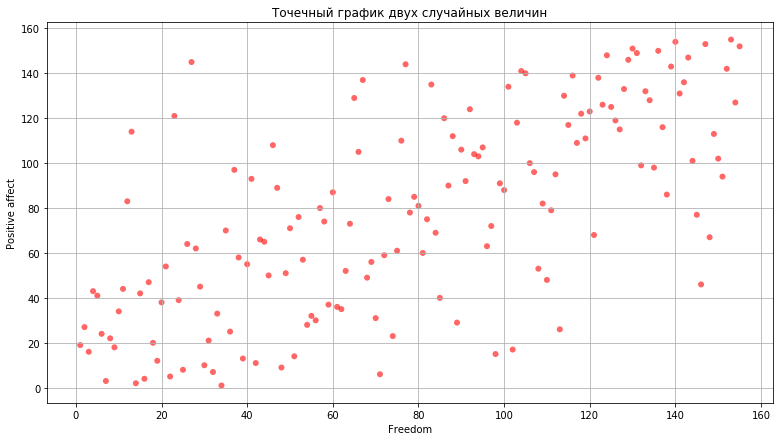

In [14]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='red'\
           , alpha=0.6, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график двух случайных величин')
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [66]:
def stat_analysis(your_column):
    print(f'"{your_column.name}" anlysis:')
    print(f'average: {statistics.mean(your_column)}')
    print(f'median: {statistics.median(your_column)}')
#     print(f'mode: {statistics.mode(your_column)}')
    print(f'standart deviation: {statistics.pstdev(your_column)}')
    print(f'variance: {statistics.pvariance(your_column)}')
    print(f'max: {np.max(your_column)}')
    print(f'min: {np.min(your_column)}')
    print(f'range: {np.max(your_column) - np.min(your_column)}')

In [67]:
stat_analysis(df.Freedom)

"Freedom" anlysis:
average: nan
median: 71.0
standart deviation: nan
variance: nan
max: 155.0
min: 1.0
range: 154.0


In [68]:
stat_analysis(df.Freedom.fillna(0))

"Freedom" anlysis:
average: 77.5
median: 77.5
standart deviation: 45.032395746469746
variance: 2027.9166666666667
max: 155.0
min: 0.0
range: 155.0


Почему нельзя найти моду?

Все значения уникальны - нет преобладающего

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [79]:
freedom.isnull().sum()

1

In [80]:
positive_affect.isnull().sum()

1

Коэффициент корреляции Пирсона: 0.6878506740844936


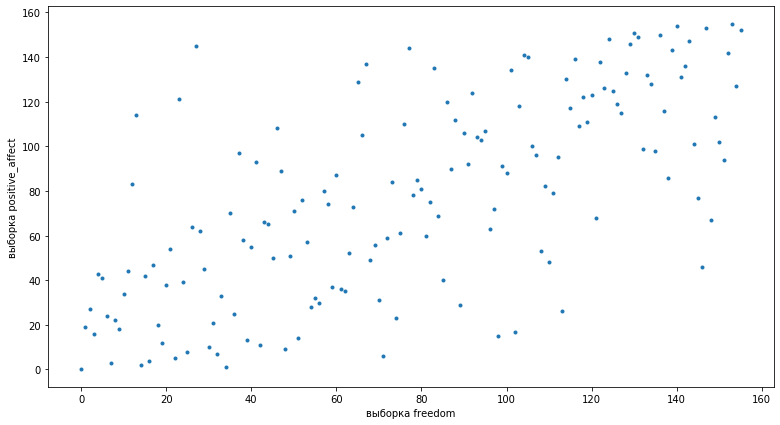

In [82]:
from scipy.stats import pearsonr
x = freedom.fillna(0)
y = positive_affect.fillna(0)

corr, p_value = pearsonr(x, y)
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive_affect')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции положительный - с увеличением чувства свободы (Freedom) увеличивается и положительный эффект, однако сам коэффициент не очень большой (0.69), значит корреляция в целом незначительна и даже высокий уровень чувства свободы может идти вместе с маленьким положительным эффектом.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [91]:
freedom = df.Freedom
freedom = freedom.dropna()
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [94]:
freedom.sort_values()

40       1.0
108      2.0
2        3.0
20       4.0
0        5.0
       ...  
121    151.0
146    152.0
148    153.0
155    154.0
153    155.0
Name: Freedom, Length: 155, dtype: float64

In [95]:
statistics.mean(freedom)

78.0

In [96]:
print(f'max: {np.max(freedom_1)}, min: {np.min(freedom_1)}')

max: 77.0, min: -77.0


In [97]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1)\
                                         .reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

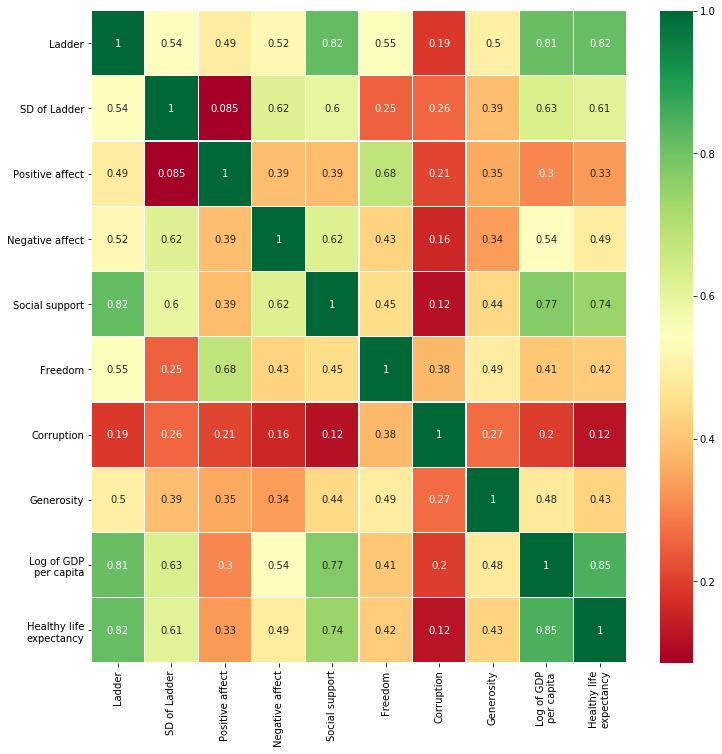

In [98]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [99]:
df=pd.read_csv('/Users/d.kolesova/Desktop/Python/PYDA-8/Lesson 18/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

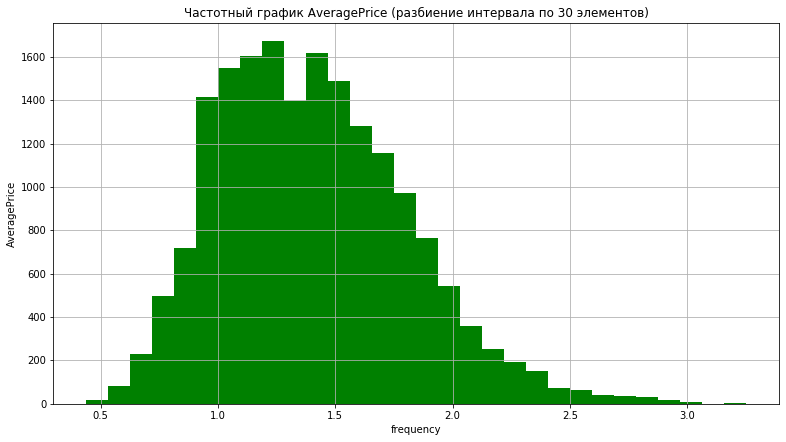

In [103]:
n, bins, patches = plt.hist(df['AveragePrice'], 30, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

Нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [106]:
df_for_corr = df[['4046', '4225', '4770', 'AveragePrice']]

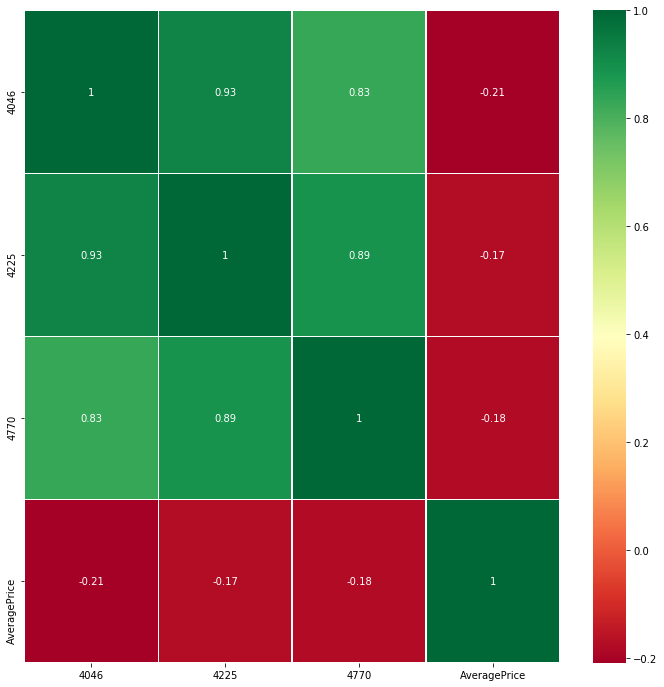

In [107]:
sns.heatmap(df_for_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

 Корреляции между средней ценой и кол-ом авокадо опеределнного типа почти нет (везде значение не больше 0,21 по модулю).
 Есть связь между кол-ом авокадо разных типов, возможно, если объем закупки растет, то он растет для всех видов.
Еще момент - корреляция между кол-ом и средней ценой везде отрицательная - чаще, при увелечении средней цены кол-во уменьшается.